# Reproductible Research

## BREAST CANCER PREDICTION

## TEAM MEMBER

1. Laura Erika Rozalia Florencia 
2. Orkhan Amrullayev 
3. Srinesh Heshan Fernando 

# PROJECT DESCRIPTION

We would like to classified the cancer diagnosis, whether it's benign or malignant based on some observations. In this code, we are trying to do the replication, which we are using the different data. Just for a reminder about our project:

1. On paper, the author are using kNN (0.99 accuracy), SVM (0.96 accuracy), Logistic Regression (0.97 accuracy) and Naive Bayes (0.95 accuracy)
2. We are trying to replicate only SVM and Logistic Regression in this code, because we got the same accuracy, thus we assume that we will get the same number for other model
3. In our code, we are using Logistic Regression (97% accuracy), SVM (96% accuracy) and Decision Tree (94% accuracy)
4. There is a diffence when we are using Decision Tree  
5. Real data consist of 768 rows, and the replication has 286 rows  
6. In this dataset, we practically change the float or text value to number as provided in the next part

====
Ten real-valued features are computed for each cell nucleus (information from the website):

a) age: 10-19 (1), 20-29 (2), 30-39 (3), 40-49 (4), 50-59 (5), 60-69 (6), 70-79 (7), 80-89 (8), 90-99 (9).  
b) menopause: lt40, ge40, premeno.  
c) tumor-size: 0-4 (4), 5-9 (9), 10-14 (14), 15-19 (19), 20-24 (24), 25-29 (29), 30-34 (34), 35-39 (39), 40-44 (44), 45-49 (49), 50-54 (54), 55-59 (59).  
d) inv-nodes: 0-2 (2), 3-5 (5), 6-8 (8), 9-11 (11), 12-14 (14), 15-17 (17), 18-20 (20), 21-23 (23), 24-26 (26), 27-29 (29), 30-32 (32), 33-35 (35), 36-39 (39).  
e) node-caps: yes (1), no (0).  
f) deg-malig: 1, 2, 3.  
g) breast: left (0), right (1).  
h) breast-quad: left-up, left-low, right-up, right-low, central.  
i) irradiat: 1, 0 (the part where it's malignant = 1 or benign = 0 in the previous replication)  
j) class: no-recurrence-events, recurrence-events  

Class Distribution:  
no-recurrence-events: 201 instances  
recurrence-events: 85 instances  

# IMPORTING LIBRARY & DATA

In [1]:
# Firstly we should import the data for data manipulation using dataframes (pandas), for statistical analysis (numpy), 
# for data visualization (matplotlib) and statistical data visualization (seaborn)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Laura Eflor\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [105]:
# Import breast cancer from CSV

data = pd.read_csv("breast_cancer_repro.csv")
data

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,4,premeno,19.0,2,1,3,1,0_up,0,recurrence-events
1,5,ge40,19.0,2,0,1,1,central,0,no-recurrence-events
2,5,ge40,39.0,2,0,2,0,0_low,0,recurrence-events
3,4,premeno,39.0,2,1,3,1,0_low,1,no-recurrence-events
4,4,premeno,34.0,5,1,2,0,1_up,0,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,5,ge40,34.0,8,1,2,0,0_low,0,no-recurrence-events
282,5,premeno,29.0,5,1,2,0,0_low,1,no-recurrence-events
283,3,premeno,34.0,8,1,2,1,1_up,0,no-recurrence-events
284,5,premeno,19.0,2,0,2,1,0_low,0,no-recurrence-events


In [12]:
data.keys()

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [13]:
# Get the target for observation, both 0 and 1 is the interpretation of the target_names 

print(data['irradiat']) 

0      0
1      0
2      0
3      1
4      0
      ..
281    0
282    1
283    0
284    0
285    0
Name: irradiat, Length: 286, dtype: int64


In [14]:
# Check the data dimension in the dataset
# 286 rows with 10 columns

data.shape

(286, 10)

In [60]:
# Get the first 5 data on dataset
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,4,premeno,19,2,1,3,1,0_up,0,recurrence-events
1,5,ge40,19,2,0,1,1,central,0,no-recurrence-events
2,5,ge40,39,2,0,2,0,0_low,0,recurrence-events
3,4,premeno,39,2,1,3,1,0_low,1,no-recurrence-events
4,4,premeno,34,5.00,1,2,0,1_up,0,recurrence-events


In [61]:
# Get the last 5 data on dataset
data.tail()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
281,5,ge40,34,8,1,2,0,0_low,0,no-recurrence-events
282,5,premeno,29,5,1,2,0,0_low,1,no-recurrence-events
283,3,premeno,34,8,1,2,1,1_up,0,no-recurrence-events
284,5,premeno,19,2,0,2,1,0_low,0,no-recurrence-events
285,5,ge40,44,2,0,3,0,1_up,0,no-recurrence-events


# DATA VISUALIZATION

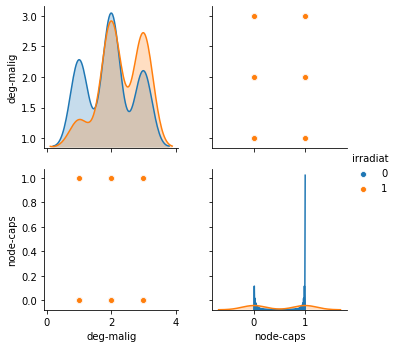

In [106]:
# Check the data visualization using seaborn pairplot. We do the observation for each 'mean' from the target in the data 
# observation.
# We can see that the data distribute clearly into 2 clusters and we have the combination observation for each parameter

# Orange color = benign
# Blue color = malignant

sns.pairplot(data, hue = 'irradiat', vars = ['deg-malig', 'node-caps'])

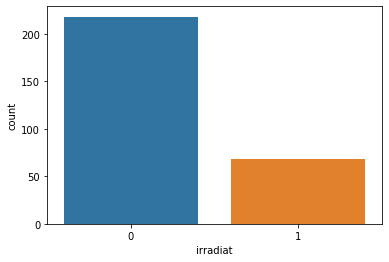

In [107]:
# We get the data comparison from the target, for which one can be categorized in 'Malignant' or 'Benign'.
# And here we can see that the patient with 'Benign' status is way more high than 'Malignant'

sns.countplot(data['irradiat'], label = "Count") 

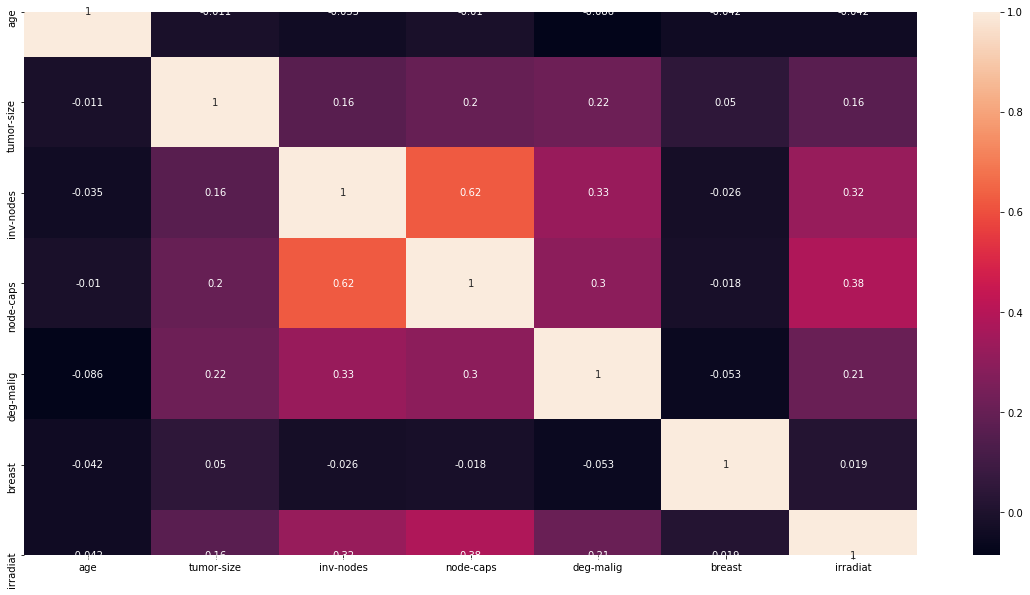

In [108]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter and get the heatmap

plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True) 

# FIND THE SOLUTION IN THE TRAINING MODEL (1)

In [109]:
# Let's drop the target label coloumns which contain text

X = data.drop(['irradiat', 'menopause', 'breast-quad', 'Class'],axis=1)
X

,age,tumor-size,inv-nodes,node-caps,deg-malig,breast
0,4,19.0,2,1,3,1
1,5,19.0,2,0,1,1
2,5,39.0,2,0,2,0
3,4,39.0,2,1,3,1
4,4,34.0,5,1,2,0
...,...,...,...,...,...,...
281,5,34.0,8,1,2,0
282,5,29.0,5,1,2,0
283,3,34.0,8,1,2,1
284,5,19.0,2,0,2,1


In [110]:
# Output result from 'Target' or 'Irradiat', the result is the diagnosis/ classification
# on patients
y = data['irradiat']
y

0      0
1      0
2      0
3      1
4      0
      ..
281    0
282    1
283    0
284    0
285    0
Name: irradiat, Length: 286, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [112]:
X_train.shape

(228, 6)

In [113]:
X_test.shape

(58, 6)

In [114]:
y_train.shape

(228,)

In [115]:
y_test.shape

(58,)

## FIRST TRIAL SVM ALGORITHMS

We train the model that we build previously. 
In the first trial, we will use Kernel Support Vector Machine (SVM).

In [116]:
# SVC = C-Support Vector Classification 

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

C:\Users\Laura Eflor\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## EVALUATING THE MODEL

In [117]:
# Now we can do the classification for the model. The final product is the heatmap of the classified target.
# We do it step by step and here is the heatmap for the original dataset

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

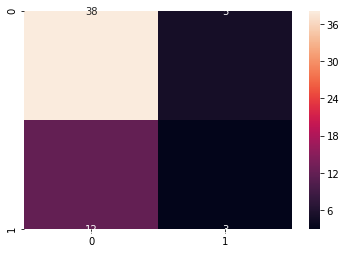

In [118]:
sns.heatmap(cm, annot=True)

In [119]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        43
           1       0.38      0.20      0.26        15

    accuracy                           0.71        58
   macro avg       0.57      0.54      0.54        58
weighted avg       0.66      0.71      0.67        58



## IMPROVING THE MODEL

In [120]:
# We get the minimum and maximum values from each parameter and get the scale for new result from data observation
min_train = X_train.min()
min_train

age           2.0
tumor-size    4.0
inv-nodes     2.0
node-caps     0.0
deg-malig     1.0
breast        0.0
dtype: float64

In [121]:
range_train = (X_train - min_train).max()
range_train

age            5.0
tumor-size    50.0
inv-nodes     24.0
node-caps      1.0
deg-malig      2.0
breast         1.0
dtype: float64

In [122]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

,age,tumor-size,inv-nodes,node-caps,deg-malig,breast
247,0.8,0.4,0.000,0.0,0.0,0.0
98,0.8,0.6,0.000,0.0,1.0,1.0
242,0.2,0.8,0.000,0.0,0.5,0.0
37,0.8,0.9,0.250,1.0,1.0,0.0
145,0.6,0.2,0.000,0.0,1.0,0.0
...,...,...,...,...,...,...
8,0.4,0.0,0.000,0.0,0.5,1.0
73,0.6,0.6,0.250,1.0,1.0,0.0
118,0.4,0.7,0.375,1.0,0.5,1.0
189,0.6,0.5,0.000,0.0,0.5,1.0


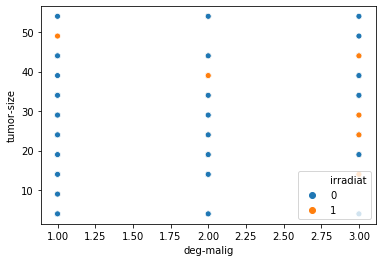

In [132]:
# Here we want to see the spread of the malignant degree and tumor size
# but it seems like the result is not like we are expected

sns.scatterplot(x = X_train['deg-malig'], y = X_train['tumor-size'], hue = y_train)

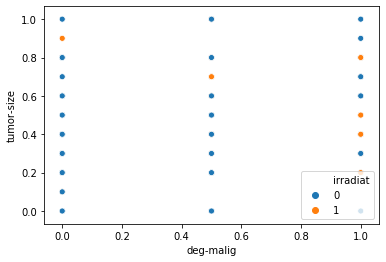

In [133]:
sns.scatterplot(x = X_train_scaled['deg-malig'], y = X_train_scaled['tumor-size'], hue = y_train)

In [134]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

## SECOND TRIAL SVM ALGORITHMS

We do another trial for the improved data and here we will get the better accuration.

In [135]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

C:\Users\Laura Eflor\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

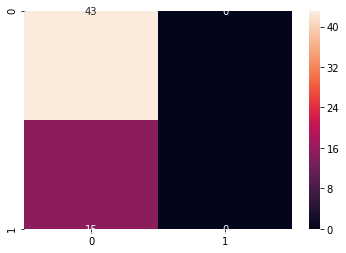

In [136]:
# Here we already get the heatmap for the new dataset based on the final observation
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [137]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        43
           1       0.00      0.00      0.00        15

    accuracy                           0.74        58
   macro avg       0.37      0.50      0.43        58
weighted avg       0.55      0.74      0.63        58



C:\Users\Laura Eflor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# FIND THE SOLUTION IN THE TRAINING MODEL (2)

We are using Logistic Regression for our second test. 

In [138]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Laura Eflor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_pred = classifier.predict(X_test)
y_pred

C:\Users\Laura Eflor\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

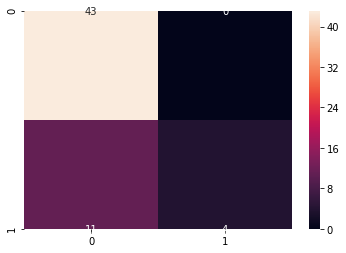

In [140]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        43
           1       1.00      0.27      0.42        15

    accuracy                           0.81        58
   macro avg       0.90      0.63      0.65        58
weighted avg       0.85      0.81      0.77        58



# FIND THE SOLUTION IN THE TRAINING MODEL (3)

The last, now we check the result from Decision Tree method.

In [142]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Laura Eflor\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\Laura Eflor\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: http

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [143]:
y_pred3 = classifier.predict(X_test)
y_pred3

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

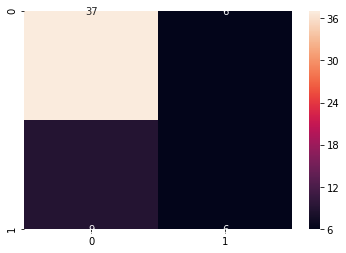

In [144]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt="d")

In [145]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        43
           1       0.50      0.40      0.44        15

    accuracy                           0.74        58
   macro avg       0.65      0.63      0.64        58
weighted avg       0.73      0.74      0.73        58



# SUMMARY

We are using 3 different algorithms to test our prediction. Those 3 gave different accuracy to classify the model for breast cancer patient. Here is the result:
1. Kernel SVM: 74%
2. Logistic Regression: 81% 
3. Decision Tree: 74%  

So for this case, the best algorithms to be used in the test is the Logistic Regression. The best algorithms is actually consistent with the first observation. However, the accuracy value are different, as shown below:  
Observation || SVM || LR  || Decision Tree  
First       || 96% || 97% || 94%  
Second      || 74% || 81% || 74%  

The degree of accuracy are different, and in our second data, we have some limitation because the data is less than the initial one. 

# SOURCES:
1. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=breast#sklearn.datasets.load_breast_cancer
https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_self_training_varying_threshold.html#sphx-glr-auto-examples-semi-supervised-plot-self-training-varying-threshold-py
3. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
4. https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
5. https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/#:~:text=gamma%20is%20a%20parameter%20of,decision%20region%20is%20very%20broad.
6. https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
7. https://intellipaat.com/community/19362/what-is-the-difference-between-svc-and-svm-in-scikit-learn
8. https://intellipaat.com/blog/tutorial/machine-learning-tutorial/svm-algorithm-in-python/
9. https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3
10. https://www.dataquest.io/blog/sci-kit-learn-tutorial/#:~:text=Scikit%2Dlearn%20is%20a%20free,libraries%20like%20NumPy%20and%20SciPy%20.
11. https://datahub.io/machine-learning/breast-cancer#readme

### Cheers!